In [21]:
%run bk_RW_catalogue.ipynb

import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [32]:

df_VG = pd.read_csv('df_VG_labeled.csv')
df_clustered = pd.read_csv('df_clusterd.csv')

df_clustered = df_clustered.set_index(['gauge_id','fillNumber'], drop=True)

In [36]:
display(df_VG.shape)
display(df_VG['y'].value_counts())
df_VG.tail()

(811, 3)

ok       455
delta    147
noise    130
spike     79
Name: y, dtype: int64

gauge_id  fillNumber      y
806  VGPB.198.5R5.R.PR        2040  delta
807    VGPB.2.6L8.R.PR        2040  delta
808  VGPB.653.5R3.R.PR        2040  delta
809   VGI.319.5R3.R.PR        2040  delta
810   VGI.697.5L3.R.PR        2040  delta

In [18]:
file = 'df_VG_labeled.csv'
verbose = False


In [31]:
# for (gauge_id, fillNumber), row in df_clustered.iloc[150:].iterrows():
    
#     if entry_in_catalogue(file, gauge_id, fillNumber, verbose=verbose) == False:
#         plt.figure()
#         plt.plot(range(3000), row, label=gauge_id)
#         plt.legend()
#         plt.show()
        
#         resp = input(">>>")
        
#         if resp == 'delta':
#             add_to_catalogue(file, gauge_id, fillNumber, resp, verbose=True)
#         else:
#             print('fill_'+str(fillNumber)+'_'+gauge_id+' skipped')
        

## Splitting the dataset

In [52]:
df_delta = df_VG[df_VG.y == 'delta']
df_delta.head()
df_ok = df_VG[df_VG.y != 'delta']
df_ok.shape

(664, 3)

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

df_ok['y_encoded']= ordinal_encoder.fit_transform(df_ok[['y']])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.75, random_state=42)
for train_index, test_index in split.split(df_ok, df_ok['y_encoded']):
    df_ok_train = df_ok.iloc[train_index]
    df_ok_test = df_ok.iloc[test_index]

In [54]:
df_ok_train.y.value_counts().sum()

166

In [75]:
df_tot = pd.concat([df_ok_train, df_delta], sort=False, axis=0)
df_tot.drop(columns='y_encoded', inplace=True)
df_tot.to_csv('df_VG_balanced.csv', index=False)

In [72]:
df_raw= pd.read_csv('df_raw.csv')
df_merged = pd.merge(df_raw,df_tot, on =['gauge_id','fillNumber'])
df_merged = df_merged.set_index(['gauge_id','fillNumber'], drop=True)

ok


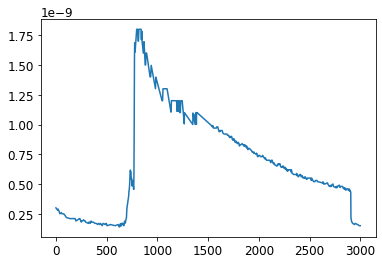

ok


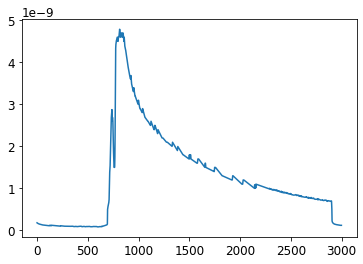

ok


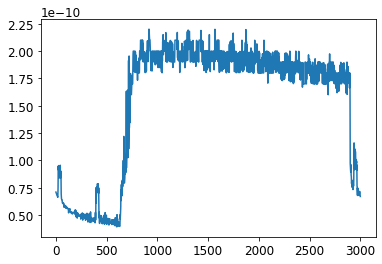

delta


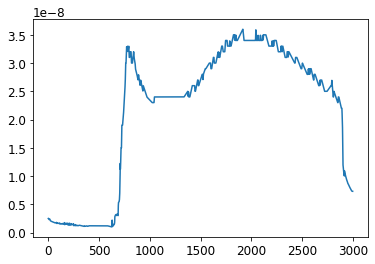

spike


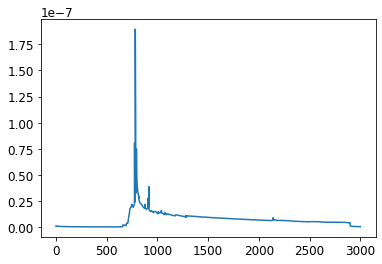

delta


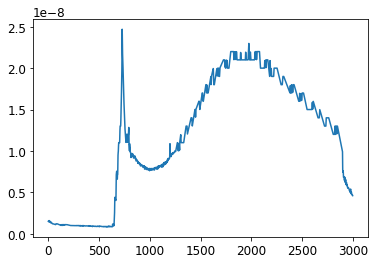

delta


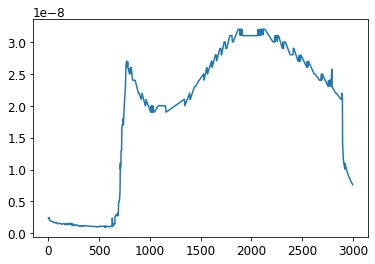

delta


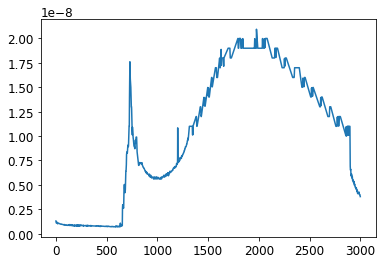

ok


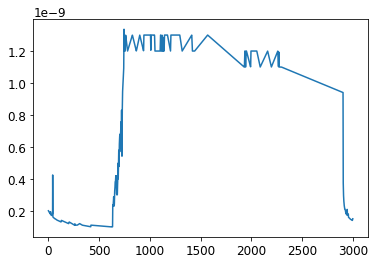

spike


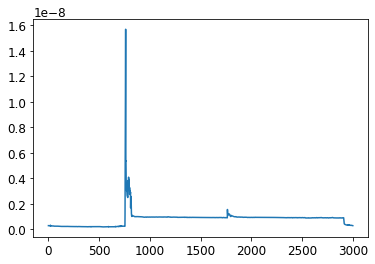

spike


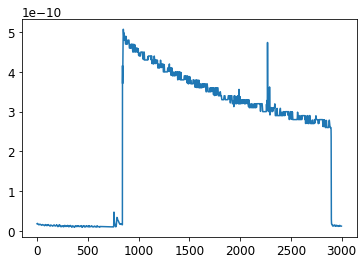

ok


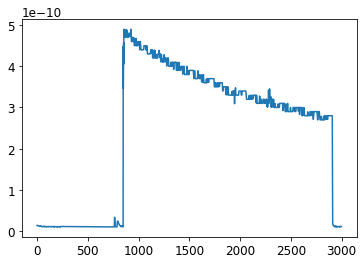

ok


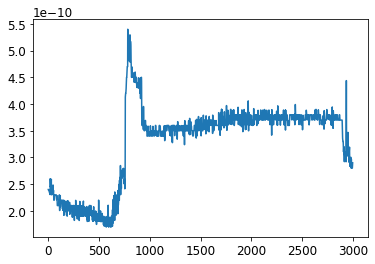

ok


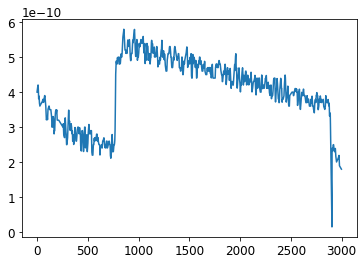

ok


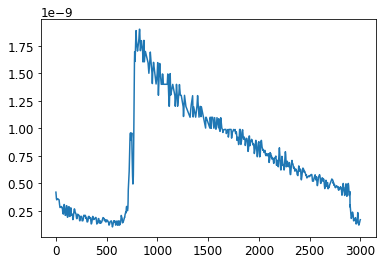

ok


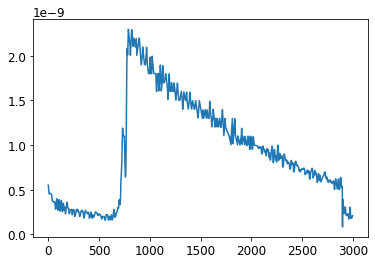

ok


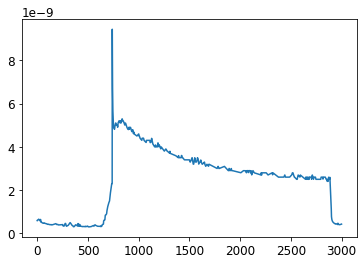

ok


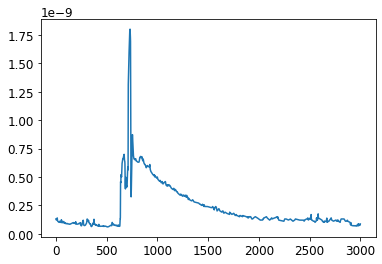

ok


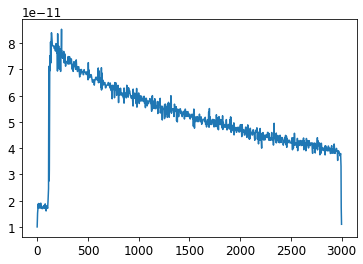

noise


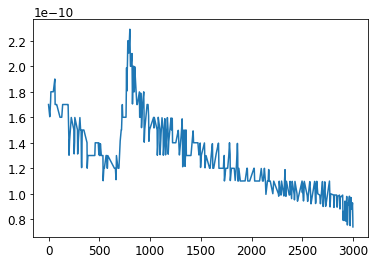

noise


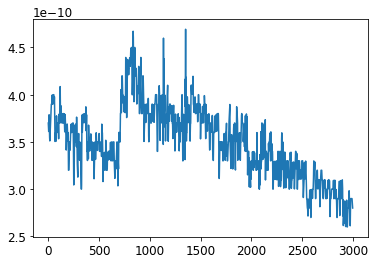

noise


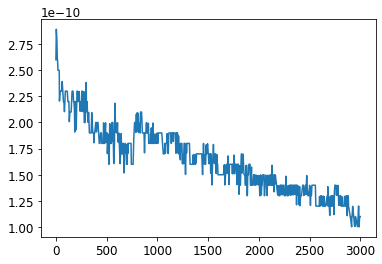

delta


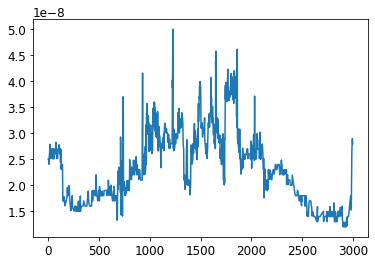

ok


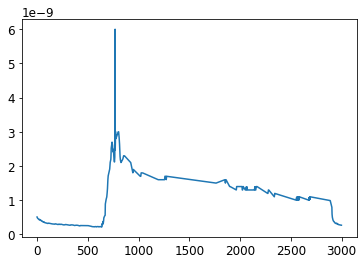

delta


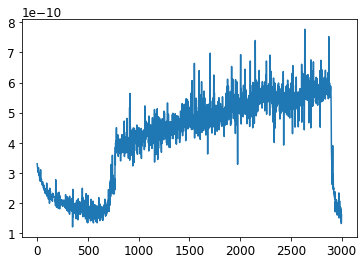

delta


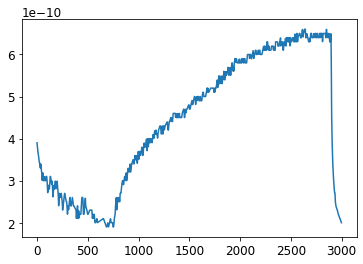

delta


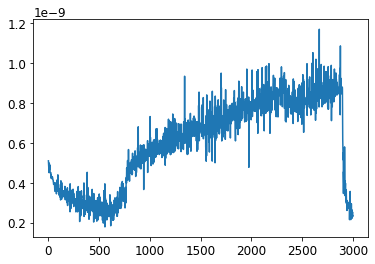

ok


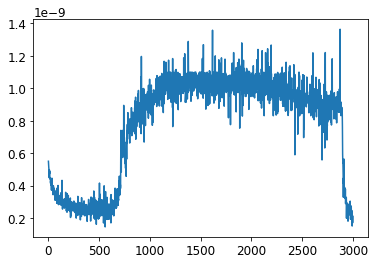

delta


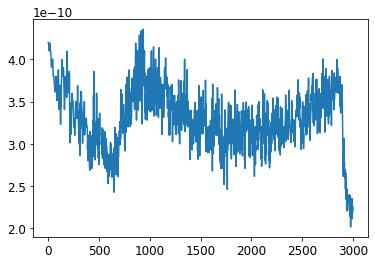

delta


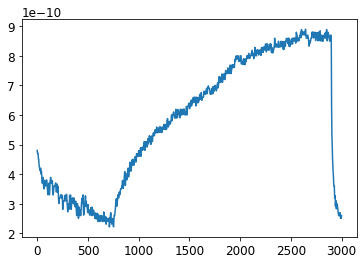

noise


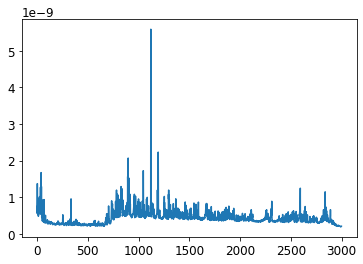

ok


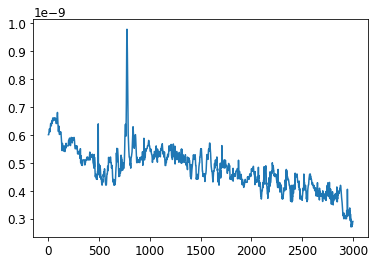

spike


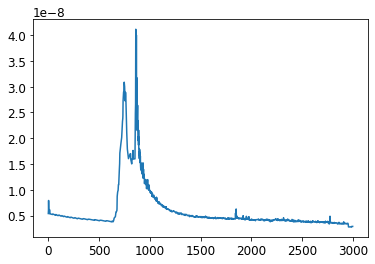

ok


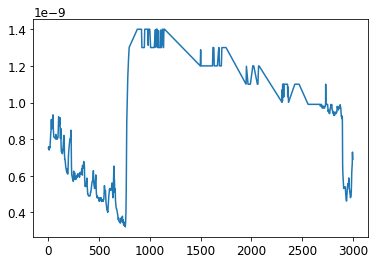

spike


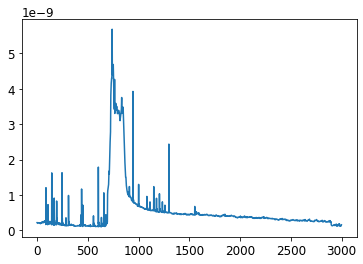

ok


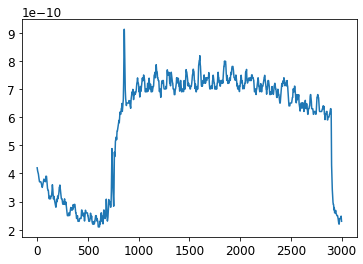

ok


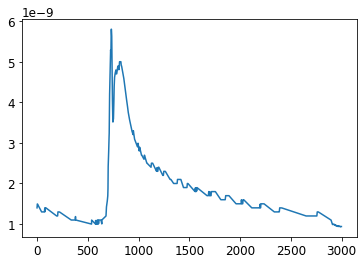

ok


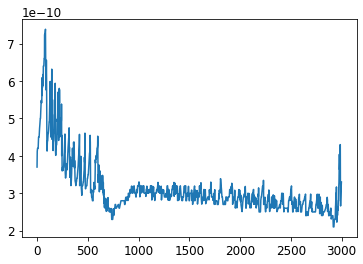

ok


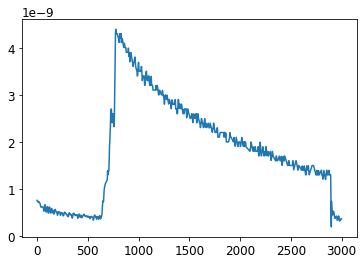

ok


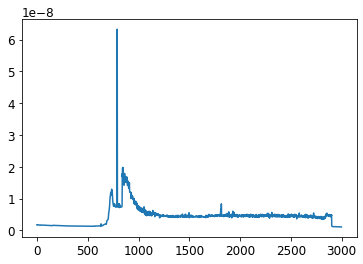

ok


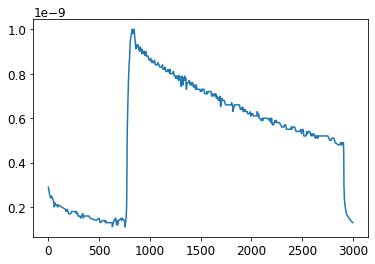

ok


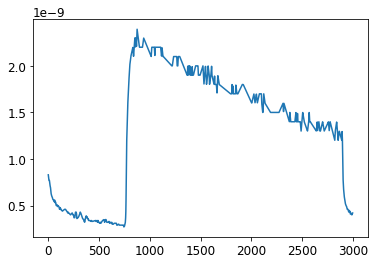

noise


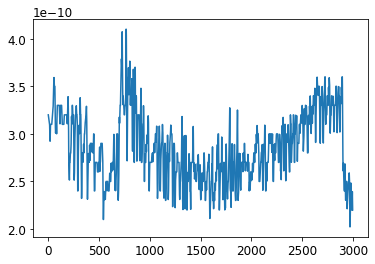

spike


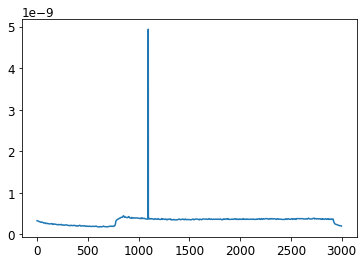

delta


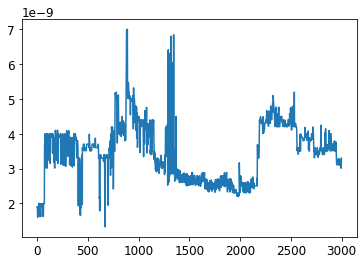

ok


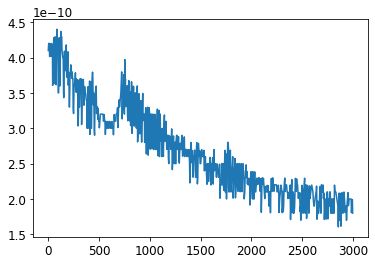

delta


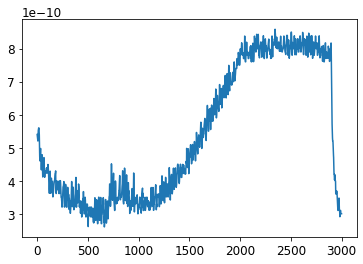

ok


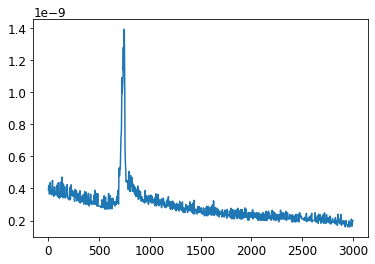

delta


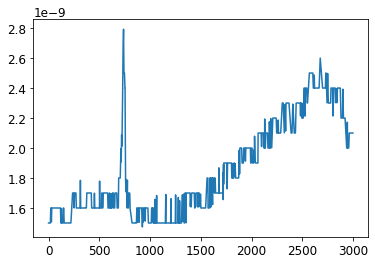

noise


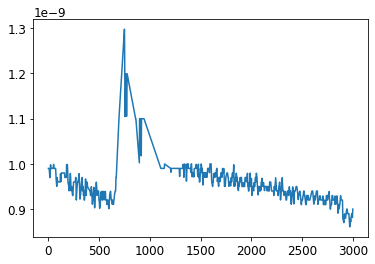

ok


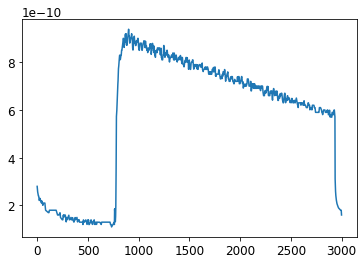

ok


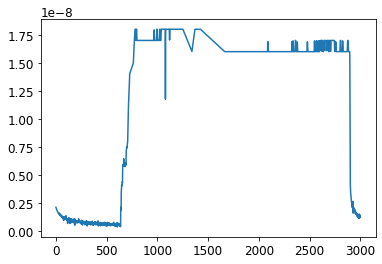

delta


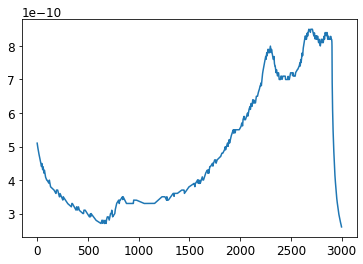

ok


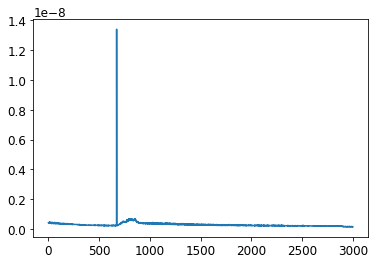

ok


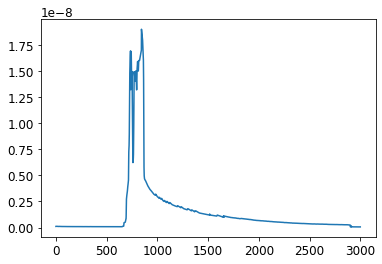

noise


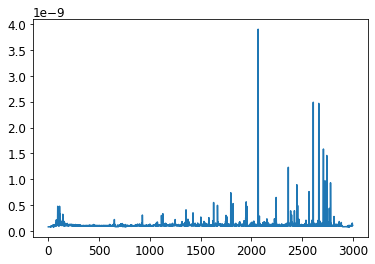

noise


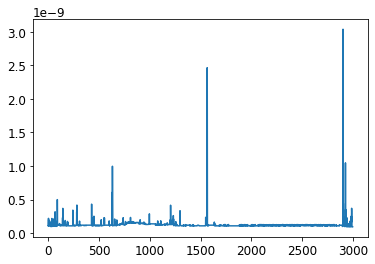

noise


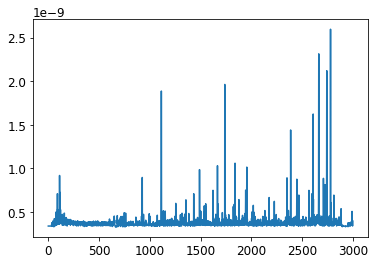

noise


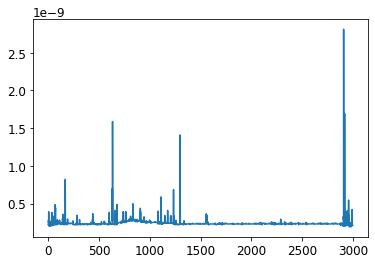

ok


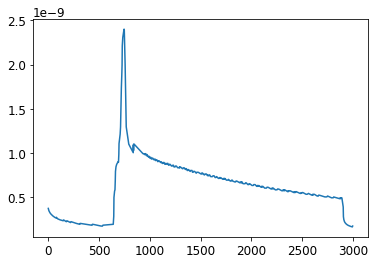

delta


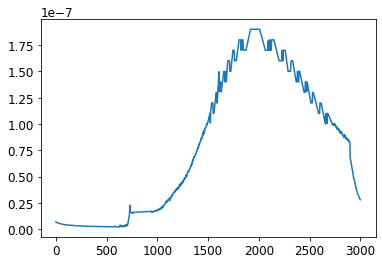

delta


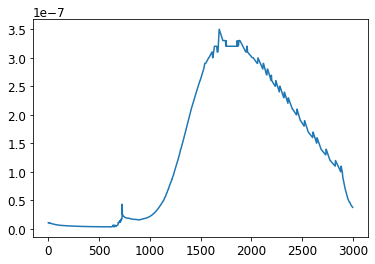

delta


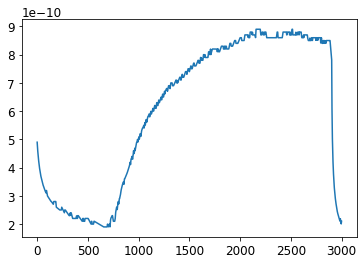

ok


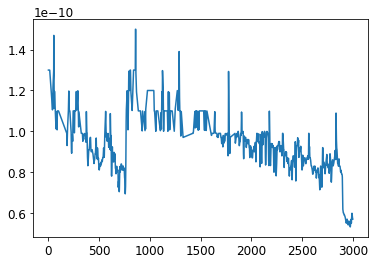

ok


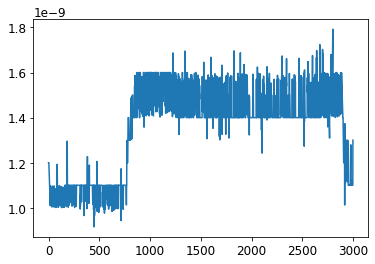

ok


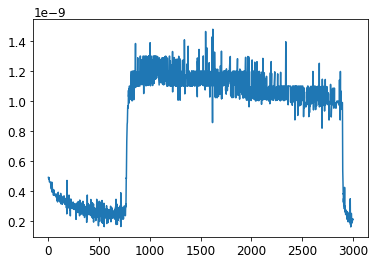

delta


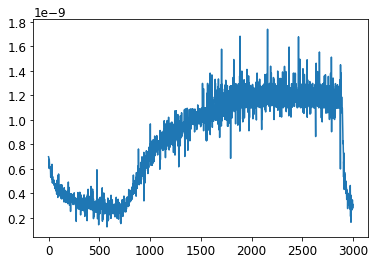

ok


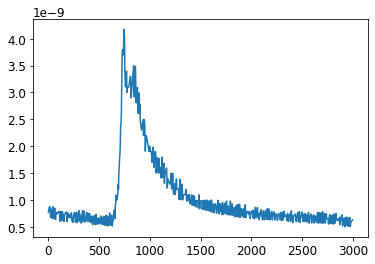

noise


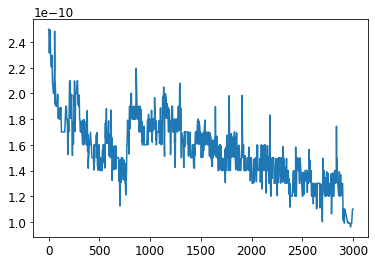

noise


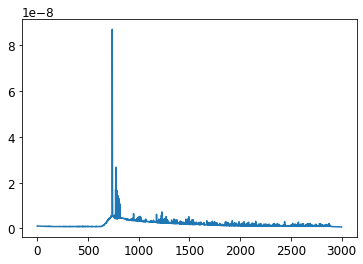

ok


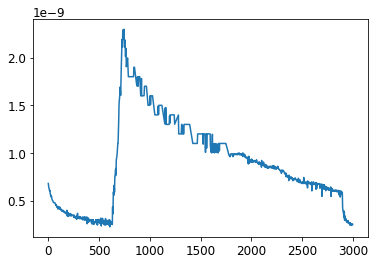

ok


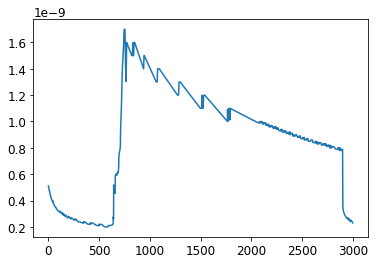

ok


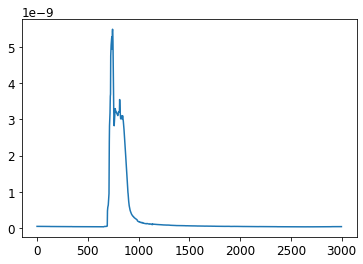

ok


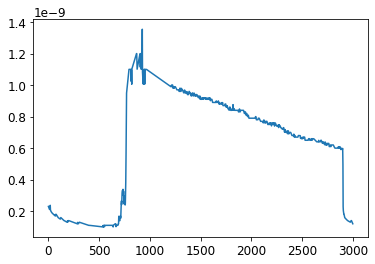

spike


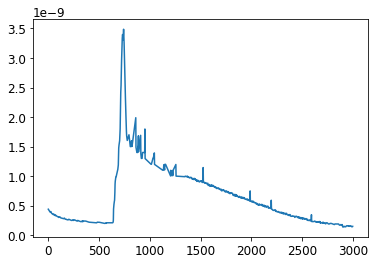

ok


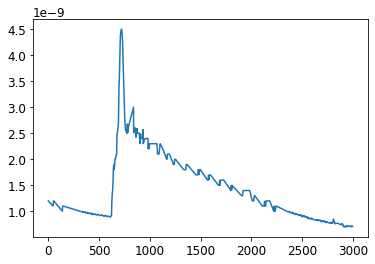

ok


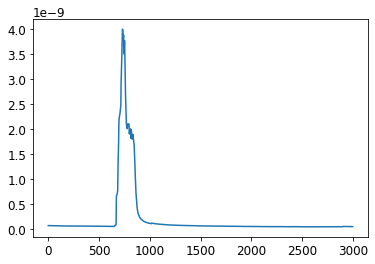

delta


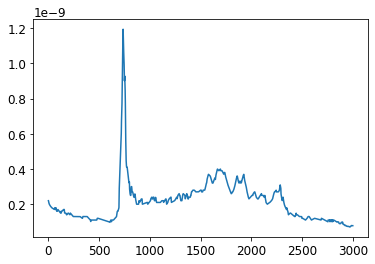

ok


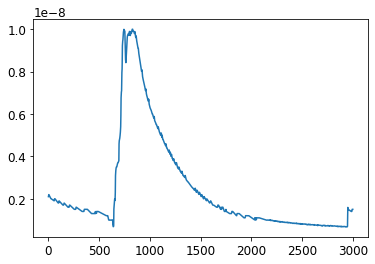

delta


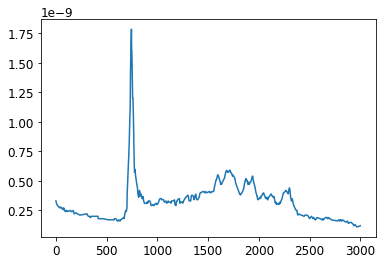

In [83]:
i=0
for index, row in df_merged.iterrows():
    if i<80:
        print(row[-1])
        plt.figure()
        plt.plot(range(3000), row[:-1])
        plt.show()


    i+=1